In [2]:
import pandas as pd #скачиваем библиотеки 
import missingno as msno
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


import warnings
warnings.filterwarnings("ignore")

## 1. Предобработка данных

In [4]:
df = pd.read_excel('transactions_data.xlsx') #распаковываем файл 

In [5]:
df.head() #смотрим, как выглядит датафрейм 

,transaction_id,client_id,transaction_date,service,amount,payment_method,city,consultant
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,2025-01-04 00:02:20,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller
1,0d5263ec-413d-44d9-a9d3-a996e3a56b05,c940f45c-d29b-439a-8fa3-f75018cef528,2025-03-10 17:16:50,Структурирование капитала,37514.809209,Неизвестно,New Zacharyport,Frank Pollard
2,5e9a8978-df1c-483f-a53b-16149c93f11e,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,2025-02-13 19:43:49,Структурирование капитала,21022.146872,Неизвестно,Port Michellemouth,Alexandra Meyer
3,524031ea-56e2-410a-aee2-e8fc6ae3fbc5,NaN,2025-03-02 03:14:10,Финансовое планирование,2313.980219,Неизвестно,Erichaven,Patricia Haas
4,421aaf04-c97d-42ac-b35f-09a56bbaf910,3f43d7bc-37f0-4535-8391-51702d6ff81e,2025-03-18 21:00:36,Структурирование капитала,5636.586955,Неизвестно,Bondstad,Melissa Pena


In [6]:
df.shape #смотрим размерность файла 

(10000, 8)

In [7]:
df = df.drop_duplicates() #удаляем дубликаты, если есть 

<Axes: >

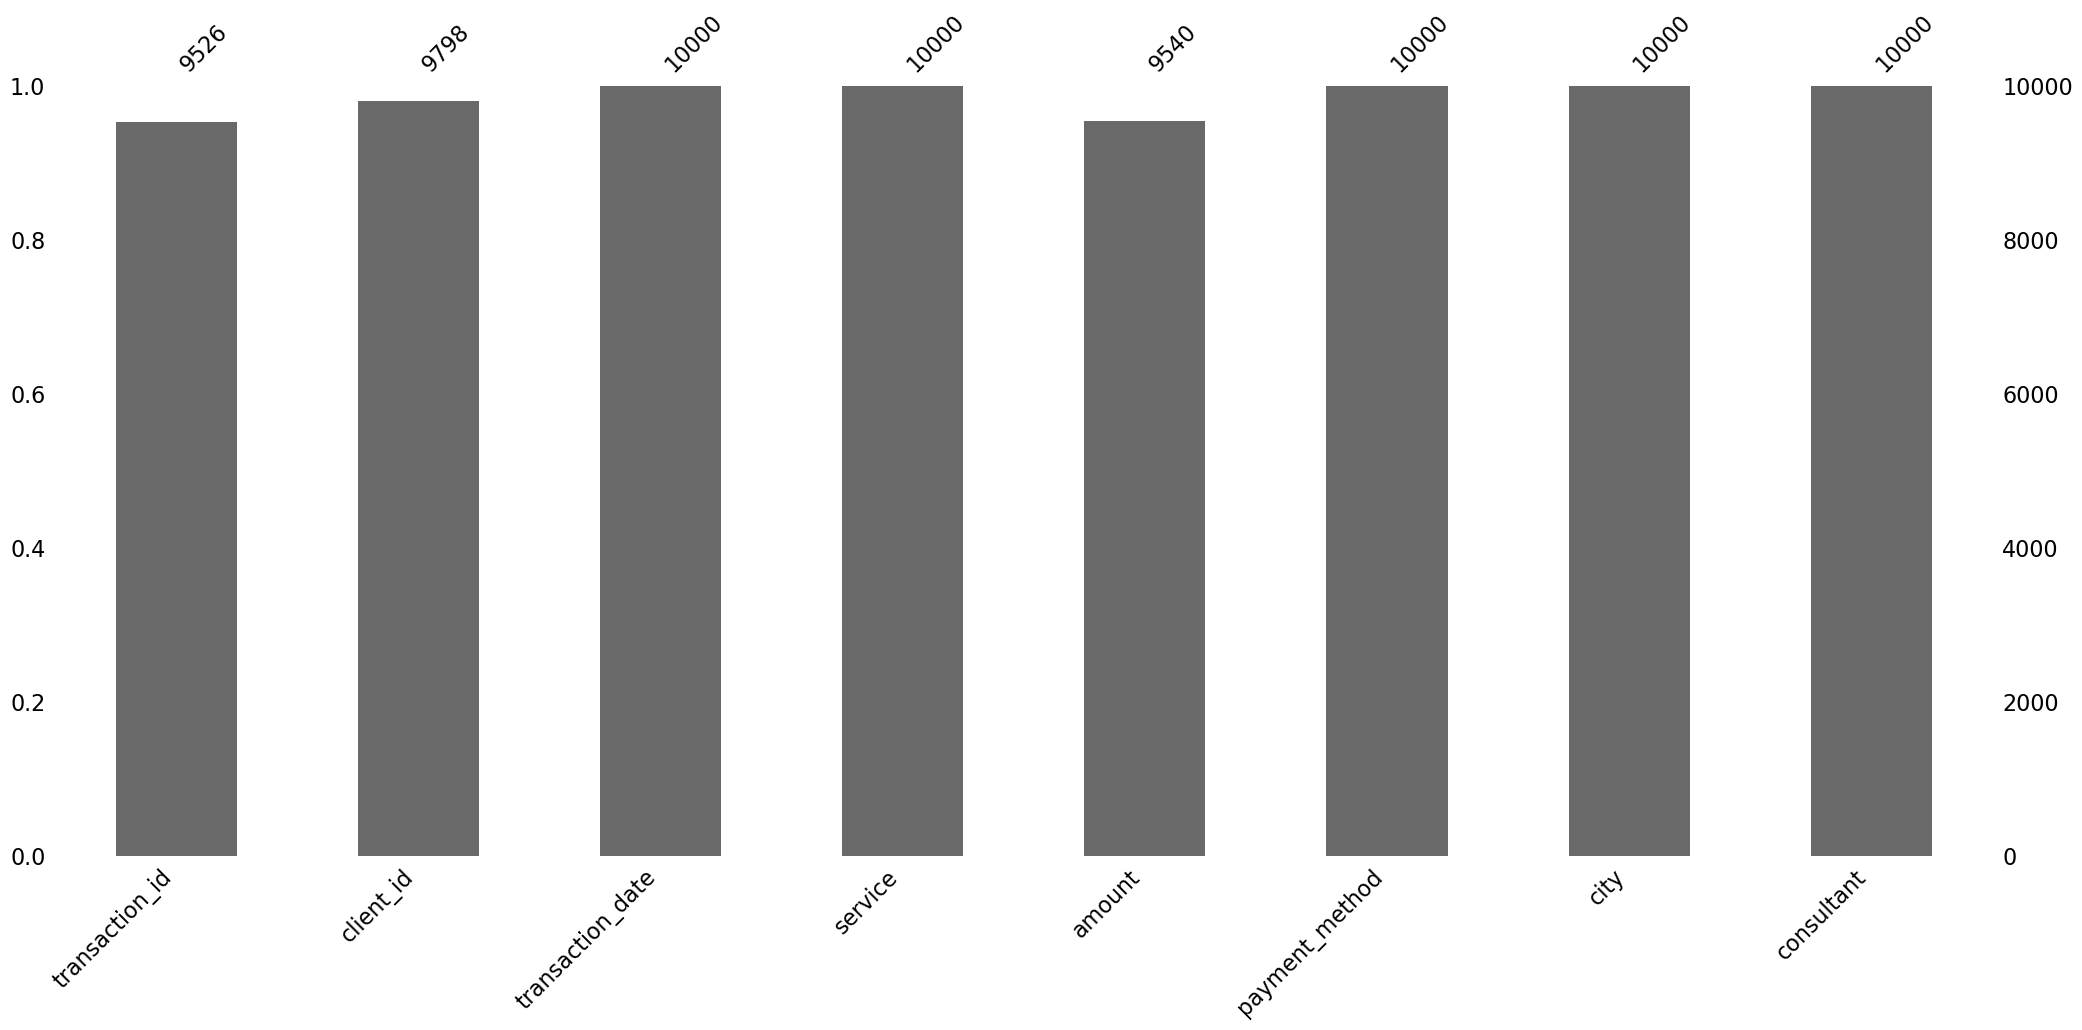

In [8]:
msno.bar(df) #наглядно смотрим есть ли пропуски 

In [9]:
client_json = pd.read_json('clients_data.json')
client_json

,id,age,gender,net_worth
0,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,41.0,Мужчина,2514729.46
1,c940f45c-d29b-439a-8fa3-f75018cef528,28.0,Мужчина,566568.29
2,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,55.0,Женщина,1896001.28
3,None,38.0,Женщина,4538759.60
4,3f43d7bc-37f0-4535-8391-51702d6ff81e,31.0,Мужчина,4865849.92
...,...,...,...,...
9794,b79d6e9f-75f6-4af9-8fdf-b42aac298a84,33.0,Женщина,699254.80
9795,d2a4a79b-26ba-41c9-b720-1362b9f464f0,31.0,None,2856777.27
9796,5e1d67fb-26ea-48cc-9e2d-e2edbda404d0,49.0,None,3865097.90
9797,77ea6e72-df3c-47d4-a043-f990cc05a6f4,33.0,Женщина,4873134.42


In [10]:
df = df.rename(columns={'client_id':'id'})
df.head() #переимновала столбец, чтобы объеденить по id

,transaction_id,id,transaction_date,service,amount,payment_method,city,consultant
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,2025-01-04 00:02:20,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller
1,0d5263ec-413d-44d9-a9d3-a996e3a56b05,c940f45c-d29b-439a-8fa3-f75018cef528,2025-03-10 17:16:50,Структурирование капитала,37514.809209,Неизвестно,New Zacharyport,Frank Pollard
2,5e9a8978-df1c-483f-a53b-16149c93f11e,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,2025-02-13 19:43:49,Структурирование капитала,21022.146872,Неизвестно,Port Michellemouth,Alexandra Meyer
3,524031ea-56e2-410a-aee2-e8fc6ae3fbc5,NaN,2025-03-02 03:14:10,Финансовое планирование,2313.980219,Неизвестно,Erichaven,Patricia Haas
4,421aaf04-c97d-42ac-b35f-09a56bbaf910,3f43d7bc-37f0-4535-8391-51702d6ff81e,2025-03-18 21:00:36,Структурирование капитала,5636.586955,Неизвестно,Bondstad,Melissa Pena


In [11]:
df_general = pd.merge(df, client_json, on = 'id', how ='inner') #объеденияем по id
df_general.head(5)

,transaction_id,id,transaction_date,service,amount,payment_method,city,consultant,age,gender,net_worth
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,2025-01-04 00:02:20,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller,41.0,Мужчина,2514729.46
1,0d5263ec-413d-44d9-a9d3-a996e3a56b05,c940f45c-d29b-439a-8fa3-f75018cef528,2025-03-10 17:16:50,Структурирование капитала,37514.809209,Неизвестно,New Zacharyport,Frank Pollard,28.0,Мужчина,566568.29
2,5e9a8978-df1c-483f-a53b-16149c93f11e,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,2025-02-13 19:43:49,Структурирование капитала,21022.146872,Неизвестно,Port Michellemouth,Alexandra Meyer,55.0,Женщина,1896001.28
3,524031ea-56e2-410a-aee2-e8fc6ae3fbc5,NaN,2025-03-02 03:14:10,Финансовое планирование,2313.980219,Неизвестно,Erichaven,Patricia Haas,38.0,Женщина,4538759.60
4,0aed2448-4e41-4dfb-8de5-7a9e6f6d8d33,NaN,2025-01-27 18:27:54,Управление активами,110744.480002,Банковский перевод,New Ryan,Phillip White,38.0,Женщина,4538759.60


In [12]:
df_general.shape #смотрим размерность 

(10000, 11)

Посмотрим сколько всего строк хотя бы с 1 отсутствующим значением

In [14]:
nan_rows = df_general[df_general.isna().any(axis=1)]
nan_rows #много, все удалить не сможем 

,transaction_id,id,transaction_date,service,amount,payment_method,city,consultant,age,gender,net_worth
3,524031ea-56e2-410a-aee2-e8fc6ae3fbc5,NaN,2025-03-02 03:14:10,Финансовое планирование,2313.980219,Неизвестно,Erichaven,Patricia Haas,38.0,Женщина,4538759.60
4,0aed2448-4e41-4dfb-8de5-7a9e6f6d8d33,NaN,2025-01-27 18:27:54,Управление активами,110744.480002,Банковский перевод,New Ryan,Phillip White,38.0,Женщина,4538759.60
5,0b83328f-0b7c-41ef-9427-aca57fc103e0,NaN,2025-01-03 16:52:49,Управление активами,14764.868857,Банковский перевод,Davidsonborough,Terry Brown,38.0,Женщина,4538759.60
6,336709d3-87f0-422d-9185-29a553c3ced1,NaN,2025-01-11 20:32:04,Управление активами,79372.257155,Кредитная карта,East Rachelmouth,Timothy Brown,38.0,Женщина,4538759.60
7,ec81ae99-2de7-465a-8885-6e9ebaaa24de,NaN,INVALID_DATE,Управление активами,13413.262381,Кредитная карта,Cruzport,Sarah Alvarez,38.0,Женщина,4538759.60
...,...,...,...,...,...,...,...,...,...,...,...
9989,c7a98736-258c-4978-91e2-86537443ed13,b76dfa79-4f8a-4e81-b944-9e4f774e6841,2025-01-07 10:44:27,Финансовое планирование,1779.592820,Кредитная карта,Port Jordan,Jessica Bates,53.0,None,2002150.31
9991,7d35d69f-8b66-4fac-827c-e7bf48946c19,4c39038a-2332-4725-bb53-37add6f3f934,2025-03-08 09:44:55,Управление активами,4636.558233,Банковский перевод,Cruzport,Deborah Stone,26.0,None,381019.85
9992,76461183-5bb7-47d6-94da-42ce94e3b9e0,bd947901-99b1-4e55-8d5f-055744d9771f,2025-02-05 05:13:45,Структурирование капитала,50933.987910,Наличные,Tonystad,Cynthia Coleman,46.0,None,NaN
9996,2234c632-4ee9-4564-8640-dd6b76838487,d2a4a79b-26ba-41c9-b720-1362b9f464f0,INVALID_DATE,Финансовое планирование,19895.571828,Кредитная карта,Davidsonborough,Ronald Shepherd,31.0,None,2856777.27


In [15]:
#Посмотрим сколько не хватает записей в amount
df_general.amount.isna().sum()

460

Посмотрим, на распределение amount

In [17]:
df_general['amount'].describe()

count      9540.000000
mean      49246.781517
std       37961.999532
min          14.044907
25%       19074.838850
50%       41651.706800
75%       71378.894526
max      277442.155248
Name: amount, dtype: float64

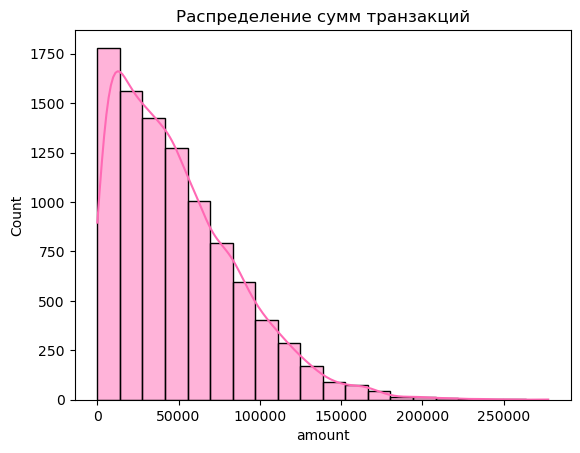

In [18]:
# Посмотрим на распределение
sns.histplot(data = df_general, x = 'amount', kde = True, bins=20, color = 'hotpink')
plt.title('Распределение сумм транзакций')
plt.show()

Также посмотрим на выбросы, они сильно влияют на распределение

<Axes: ylabel='amount'>

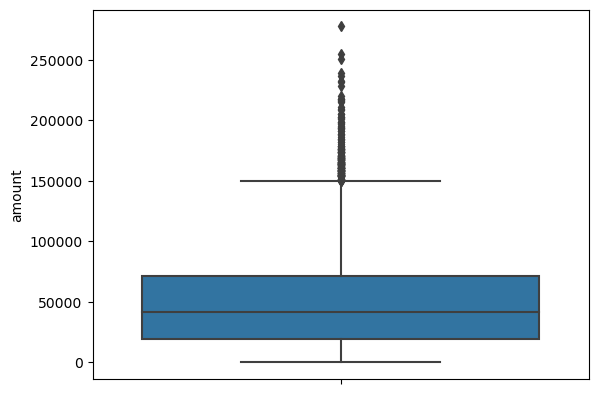

In [20]:
sns.boxplot(data = df_general, y = 'amount')

Из графика видно, что средняя чуть ниже 50000, есть выбросы начиная с до и после, посмотрим сколько составляет выбросы 

Пока пропуски заполним медианой

In [23]:
df_general['amount'] = df_general.amount.fillna(df_general.amount.median())

Также я заметила, что в столбце payment_method есть знчения 'неизвестно', попробуем исправить это с помощью группировки по столбцу service

In [25]:
stat_service = df_general[['service', 'payment_method']]
filtered_data = stat_service[stat_service['service'] == 'Структурирование капитала']
filtered_data.value_counts()

service                    payment_method    
Структурирование капитала  Кредитная карта       612
                           Банковский перевод    493
                           Наличные              156
                           Неизвестно            156
                           Криптовалюта           90
Name: count, dtype: int64

In [26]:
stat_service.service.value_counts() #посмотрим группировку по самому сервису 

service
Инвестиционное консультирование    2429
Управление активами                2014
Финансовое планирование            1532
Налоговое планирование             1528
Структурирование капитала          1507
Неизвестная услуга                  990
Name: count, dtype: int64

Также проделаем это с другими видами сервиса

In [28]:
filtered_data_2 = stat_service[stat_service['service'] == 'Управление активами']
filtered_data_2.value_counts()

service              payment_method    
Управление активами  Кредитная карта       796
                     Банковский перевод    710
                     Наличные              199
                     Неизвестно            199
                     Криптовалюта          110
Name: count, dtype: int64

In [29]:
filtered_data_3 = stat_service[stat_service['service'] == 'Инвестиционное консультирование']
filtered_data_3.value_counts()

service                          payment_method    
Инвестиционное консультирование  Кредитная карта       988
                                 Банковский перевод    876
                                 Наличные              226
                                 Неизвестно            222
                                 Криптовалюта          117
Name: count, dtype: int64

In [30]:
filtered_data_4 = stat_service[stat_service['service'] == 'Финансовое планирование']
filtered_data_4.value_counts()

service                  payment_method    
Финансовое планирование  Кредитная карта       597
                         Банковский перевод    539
                         Неизвестно            166
                         Наличные              152
                         Криптовалюта           78
Name: count, dtype: int64

In [31]:
filtered_data_5 = stat_service[stat_service['service'] == 'Налоговое планирование']
filtered_data_5.value_counts()

service                 payment_method    
Налоговое планирование  Кредитная карта       603
                        Банковский перевод    513
                        Неизвестно            157
                        Наличные              155
                        Криптовалюта          100
Name: count, dtype: int64

Во всех услугах чаще всего встречается значение кредитная карта  - заполним этим значением, а из сервиса больше инвестиционное консультирование, заполним ей

In [33]:
df_general['payment_method'] =  df_general['payment_method'].replace('Неизвестно', 'Кредитная карта')

In [34]:
df_general['service'] =  df_general['service'].replace('Неизвестная услуга', 'Инвестиционное консультирование')

In [35]:
#проверим правильность заполнения 
print(df_general.service.unique())
print(df_general.payment_method.unique())

['Структурирование капитала' 'Финансовое планирование'
 'Управление активами' 'Налоговое планирование'
 'Инвестиционное консультирование']
['Банковский перевод' 'Кредитная карта' 'Наличные' 'Криптовалюта']


In [36]:
# Проверим столбей гендер 
print(df_general.gender.unique())

['Мужчина' 'Женщина' None]


In [37]:
df_general.gender.value_counts() #женщин больше, оставим пустые значения женским полом

gender
Женщина    3487
Мужчина    3194
Name: count, dtype: int64

In [38]:
df_general.gender = df_general.gender.fillna('Женщина')

In [39]:
#Возраст
df_general.age.isna().sum()

983

In [40]:
df_general.age.describe() 

count    9017.000000
mean       40.006543
std        11.695195
min        20.000000
25%        30.000000
50%        39.000000
75%        50.000000
max        60.000000
Name: age, dtype: float64

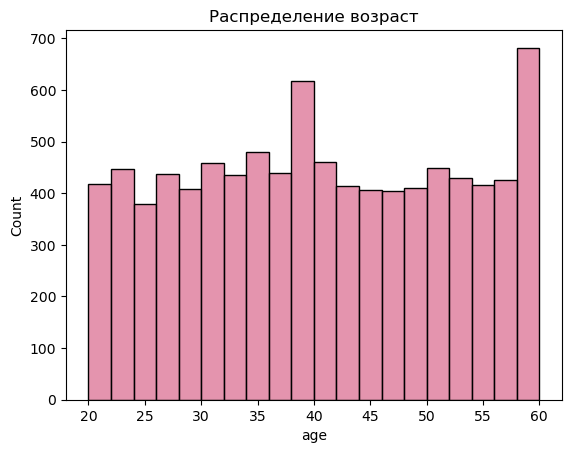

In [41]:
# Посмотрим на распределение
sns.histplot(data = df_general, x = 'age', bins=20, color = 'palevioletred' )
plt.title('Распределение возраст')
plt.show()

In [42]:
#Заполним отсутствующие значения средним 
df_general.age = df_general.age.fillna(df_general.age.mean())

In [43]:
df_general.net_worth.isna().sum()

475

In [44]:
df_general.net_worth.describe().apply(lambda x: f'{x:.5f}')

count       9525.00000
mean     2544550.66129
std      1445574.44503
min        10213.97000
25%      1291465.99000
50%      2540861.17000
75%      3813966.03000
max      4999428.12000
Name: net_worth, dtype: object

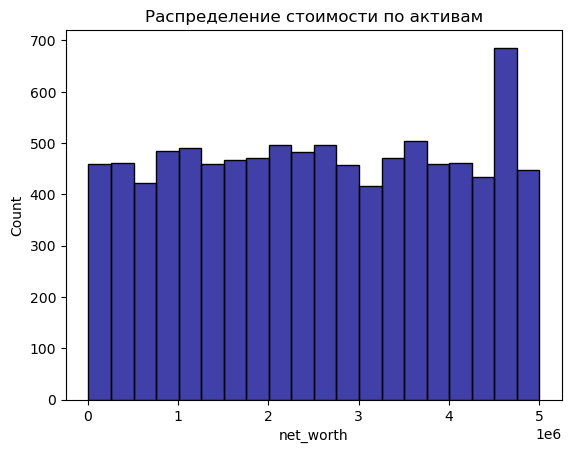

In [45]:
# Посмотрим на распределение
sns.histplot(data = df_general, x = 'net_worth', bins=20, color = 'darkblue')
plt.title('Распределение стоимости по активам')
plt.show()

In [46]:
#Отсутвующие значения можно заполить средним 
df_general.net_worth = df_general.net_worth.fillna(df_general.net_worth.mean())

In [47]:
df_general.city.unique() #пропущенных значений нет

array(['North Patrickport', 'New Zacharyport', 'Port Michellemouth',
       'Erichaven', 'New Ryan', 'Davidsonborough', 'East Rachelmouth',
       'Cruzport', 'North Lauriebury', 'Mirandaside', 'New Dianechester',
       'Tonystad', 'Johnsonfort', 'Ibarramouth', 'East Jamie',
       'East Melissaville', 'West Jaymouth', 'Lake Arielmouth',
       'Karenville', 'Patelbury', 'New Chelseaberg', 'Matthewsville',
       'South Andrew', 'North Emily', 'Roberttown', 'Harrisberg',
       'Trevinoberg', 'Elizabethmouth', 'Неизвестный город',
       'Port Jordan', 'Krystalland', 'Port Darlene', 'Dannyburgh',
       'Mayoberg', 'Aprilstad', 'New Tommyborough', 'North Melissaland',
       'Michellehaven', 'East Matthewmouth', 'South Thomas', 'Bondstad',
       'North Hannahmouth', 'Davidmouth', 'West Meredithhaven',
       'Lake Tina', 'Ronaldville', 'Kaneburgh', 'Jeanettetown',
       'Port James', 'Lake Sallychester', 'Hamiltontown'], dtype=object)

In [48]:
df_general.consultant.unique() # здесь есть неизветсный консультат, запишем его как Джон Доу

array(['Cheryl Waller', 'Frank Pollard', 'Alexandra Meyer',
       'Patricia Haas', 'Phillip White', 'Terry Brown', 'Timothy Brown',
       'Sarah Alvarez', 'Kirsten Martin', 'Gary Stevenson',
       'David Palmer', 'Mario Jones', 'Chad Raymond',
       'Неизвестный консультант', 'Jordan Phillips', 'Courtney Callahan',
       'Ethan Lowe', 'Nicholas Barry', 'Erik Garcia', 'Wendy Cooper',
       'Melissa Pena', 'Deborah Stone', 'Judith Hansen', 'Jessica Bates',
       'Ronald Shepherd', 'Michelle Morse', 'Teresa Baker',
       'Katherine Smith', 'John Wolfe', 'Ronald Benson',
       'Rachel Williamson', 'Edwin Cantrell', 'William Bell',
       'Travis Curtis', 'Gregory Williams', 'Jason Beard', 'Mary Howard',
       'Catherine Lawson', 'Harold Gibson', 'Dylan Martin',
       'Lisa Sanchez MD', 'Antonio Benton', 'Emily Stewart',
       'Julie Jones', 'Kathryn Young', 'Joshua Fuentes', 'Laura Herrera',
       'Stephen Jones', 'Cynthia Coleman', 'Tiffany James',
       'David Thompson'], d

In [49]:
df_general.consultant = df_general.consultant.replace('Неизвестный консультант', 'John Doe')

<Axes: >

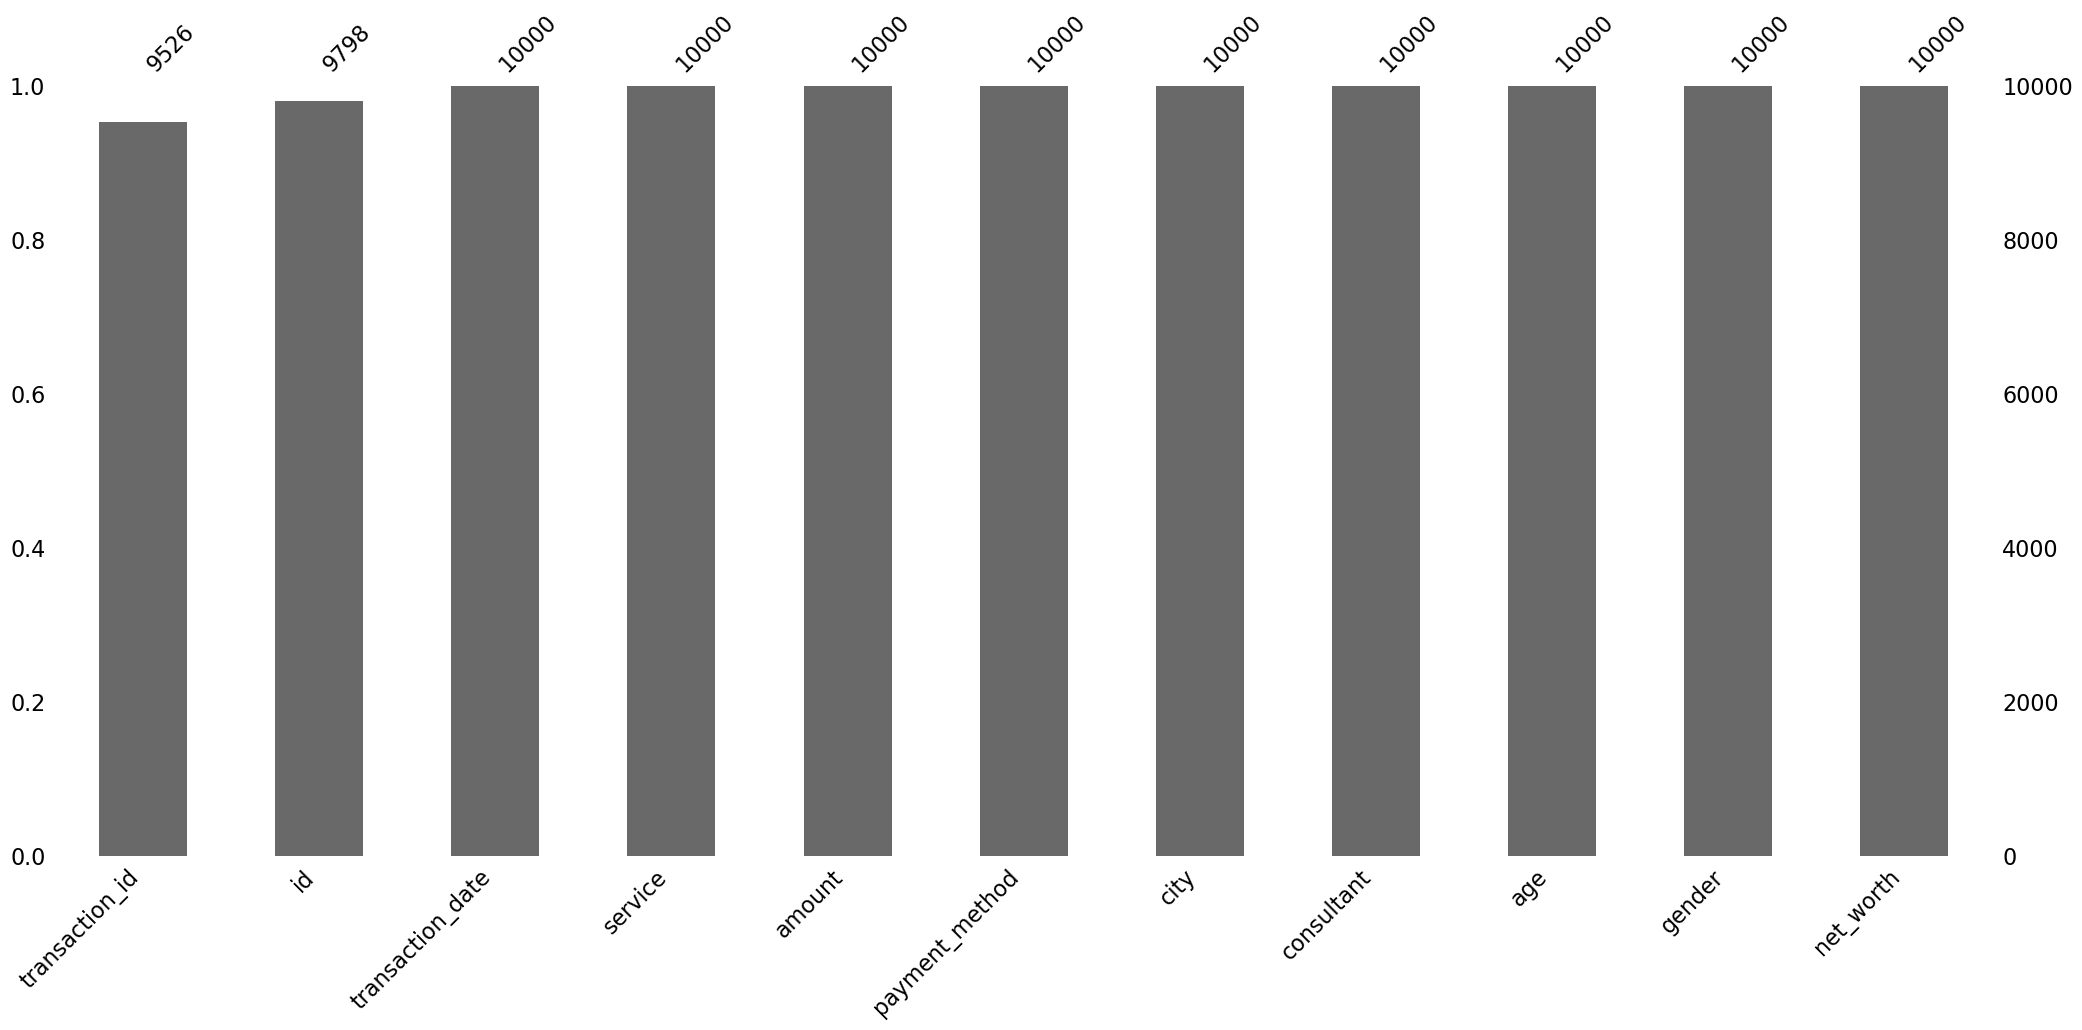

In [50]:
msno.bar(df_general)

In [51]:
# Есть ли какие-то пропущенные данные по городам 
df_general.city.unique() 

array(['North Patrickport', 'New Zacharyport', 'Port Michellemouth',
       'Erichaven', 'New Ryan', 'Davidsonborough', 'East Rachelmouth',
       'Cruzport', 'North Lauriebury', 'Mirandaside', 'New Dianechester',
       'Tonystad', 'Johnsonfort', 'Ibarramouth', 'East Jamie',
       'East Melissaville', 'West Jaymouth', 'Lake Arielmouth',
       'Karenville', 'Patelbury', 'New Chelseaberg', 'Matthewsville',
       'South Andrew', 'North Emily', 'Roberttown', 'Harrisberg',
       'Trevinoberg', 'Elizabethmouth', 'Неизвестный город',
       'Port Jordan', 'Krystalland', 'Port Darlene', 'Dannyburgh',
       'Mayoberg', 'Aprilstad', 'New Tommyborough', 'North Melissaland',
       'Michellehaven', 'East Matthewmouth', 'South Thomas', 'Bondstad',
       'North Hannahmouth', 'Davidmouth', 'West Meredithhaven',
       'Lake Tina', 'Ronaldville', 'Kaneburgh', 'Jeanettetown',
       'Port James', 'Lake Sallychester', 'Hamiltontown'], dtype=object)

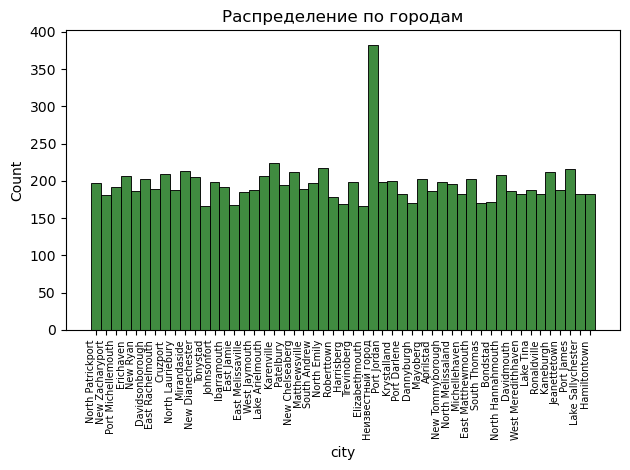

In [52]:
# Анализируем данные по городам 
sns.histplot(data = df_general, x = 'city', bins=40, color = 'darkgreen')
plt.title('Распределение по городам')
plt.xticks(rotation=90, ha='right', fontsize=7)
plt.tight_layout() 
plt.show()

Так как распределение равномерное - равномерно распределим неизвестный город по всему графику

In [54]:
def replace_invalid_city(df, invalid_marker='Неизвестный город'):
    valid_city = df[df['city'] != invalid_marker]['city'].unique()
    invalid_mask = df['city'] == invalid_marker
    city_for_invalid = np.tile(valid_city, (invalid_mask.sum() // len(valid_city)) + 1)[:invalid_mask.sum()]
    df.loc[invalid_mask, 'city'] = city_for_invalid
    return df

In [55]:
df_general = replace_invalid_city(df_general)

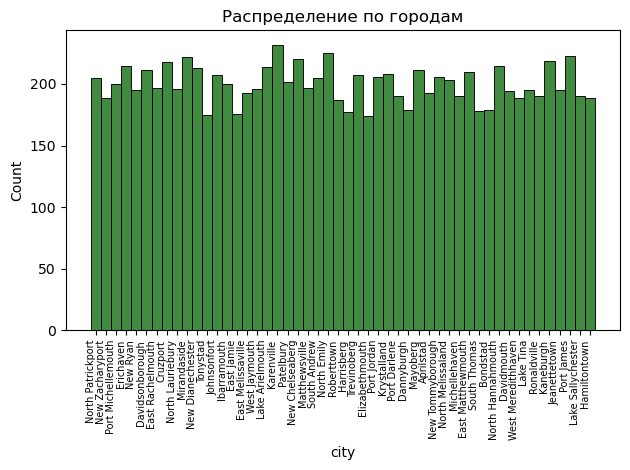

In [56]:
sns.histplot(data = df_general, x = 'city', bins=40, color = 'darkgreen')
plt.title('Распределение по городам')
plt.xticks(rotation=90, ha='right', fontsize=7)
plt.tight_layout() 
plt.show() #пропорции соблюлись

Приводим даты к единому формату

In [58]:
df_general['transaction_day'] = df_general['transaction_date'].apply(lambda x: str(x).split()[0])

In [59]:
#даты вынесли отдельно, время не нужно, можно удалить столбец 
df_general = df_general.drop('transaction_date', axis=1)

In [60]:
df_general.shape

(10000, 11)

In [61]:
# Также посмотрим сколько транзакций без дат
df_general.loc[df_general.transaction_day.apply(lambda x: x == 'INVALID_DATE')]

,transaction_id,id,service,amount,payment_method,city,consultant,age,gender,net_worth,transaction_day
7,ec81ae99-2de7-465a-8885-6e9ebaaa24de,NaN,Управление активами,13413.262381,Кредитная карта,Cruzport,Sarah Alvarez,38.000000,Женщина,4538759.60,INVALID_DATE
18,b6d34842-9281-493f-9a20-1b6f6ad72085,NaN,Структурирование капитала,53480.777402,Кредитная карта,East Melissaville,Gary Stevenson,38.000000,Женщина,4538759.60,INVALID_DATE
23,04851c94-0b3e-48ac-8010-8528bc2a34d4,NaN,Структурирование капитала,71400.239594,Банковский перевод,Patelbury,Erik Garcia,38.000000,Женщина,4538759.60,INVALID_DATE
47,d4467d7b-bd28-4d70-a077-bcc3d34d81cb,NaN,Структурирование капитала,41104.280735,Наличные,Erichaven,Frank Pollard,38.000000,Женщина,4538759.60,INVALID_DATE
65,273f4c77-a772-4c9c-ac99-1bc5d2e9652f,NaN,Инвестиционное консультирование,130016.249717,Наличные,Harrisberg,Catherine Lawson,38.000000,Женщина,4538759.60,INVALID_DATE
...,...,...,...,...,...,...,...,...,...,...,...
9964,8b8a2648-3982-4e13-8c5a-8d10e4129576,ed9c332f-d02a-411b-9414-9dec002b8821,Управление активами,15904.945889,Банковский перевод,New Ryan,Mario Jones,33.000000,Женщина,2605606.78,INVALID_DATE
9970,c186062d-b9e6-466c-abad-97a708fe90c3,fdee4854-6c12-47a0-a561-710264ce9d24,Инвестиционное консультирование,79709.903415,Банковский перевод,Hamiltontown,Gregory Williams,40.006543,Женщина,2580391.88,INVALID_DATE
9976,920abb78-41ac-442f-bf02-50398562022a,59859b6f-458d-4a72-88ee-48dba4e61574,Инвестиционное консультирование,13579.842832,Кредитная карта,Patelbury,Judith Hansen,22.000000,Женщина,4919526.46,INVALID_DATE
9978,d234eaa5-47c4-4221-9fcf-dac69c9a591a,041d30db-6572-46de-9a57-18b1c9f24034,Управление активами,32927.948723,Банковский перевод,Michellehaven,Julie Jones,45.000000,Мужчина,3351150.36,INVALID_DATE


In [62]:
# 1000 из 10000 это 10% необходимо выснить закономерность
df_general.transaction_day.value_counts()

transaction_day
INVALID_DATE    1005
2025-01-27       144
2025-01-03       141
2025-02-07       140
2025-01-19       135
                ... 
2025-02-28        98
2025-01-14        96
2025-03-01        93
2025-01-16        87
2025-03-20        71
Name: count, Length: 80, dtype: int64

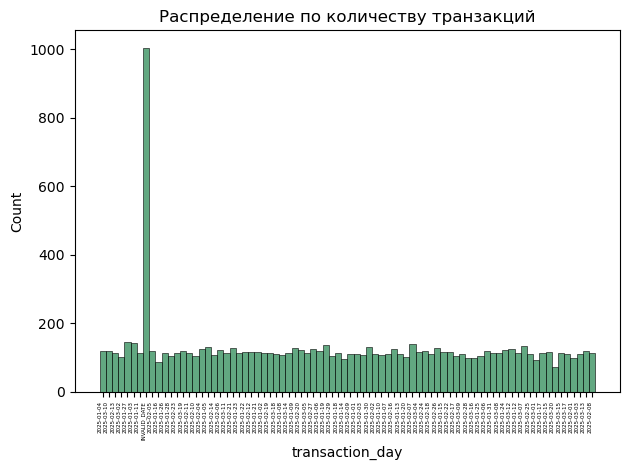

In [63]:
sns.histplot(data = df_general, x = 'transaction_day', bins=20, color = 'seagreen')
plt.title('Распределение по количеству транзакций')
plt.xticks(rotation=90, ha='right', fontsize=4)
plt.tight_layout() 
plt.show()

Из графика видно, что распределение равномерное, нужно сделать так, чтобы пробелы в датах были распределены плавно по датам

In [65]:
def replace_invalid_dates(df, invalid_marker='INVALID_DATE'):
    valid_dates = df[df['transaction_day'] != invalid_marker]['transaction_day'].unique()
    invalid_mask = df['transaction_day'] == invalid_marker
    dates_for_invalid = np.tile(valid_dates, (invalid_mask.sum() // len(valid_dates)) + 1)[:invalid_mask.sum()]
    df.loc[invalid_mask, 'transaction_day'] = dates_for_invalid
    return df

In [66]:
df_general2 = df_general.copy()

In [67]:
df_general2 = replace_invalid_dates(df_general2)

In [68]:
df_general2.head()

,transaction_id,id,service,amount,payment_method,city,consultant,age,gender,net_worth,transaction_day
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller,41.0,Мужчина,2514729.46,2025-01-04
1,0d5263ec-413d-44d9-a9d3-a996e3a56b05,c940f45c-d29b-439a-8fa3-f75018cef528,Структурирование капитала,37514.809209,Кредитная карта,New Zacharyport,Frank Pollard,28.0,Мужчина,566568.29,2025-03-10
2,5e9a8978-df1c-483f-a53b-16149c93f11e,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,Структурирование капитала,21022.146872,Кредитная карта,Port Michellemouth,Alexandra Meyer,55.0,Женщина,1896001.28,2025-02-13
3,524031ea-56e2-410a-aee2-e8fc6ae3fbc5,NaN,Финансовое планирование,2313.980219,Кредитная карта,Erichaven,Patricia Haas,38.0,Женщина,4538759.60,2025-03-02
4,0aed2448-4e41-4dfb-8de5-7a9e6f6d8d33,NaN,Управление активами,110744.480002,Банковский перевод,New Ryan,Phillip White,38.0,Женщина,4538759.60,2025-01-27


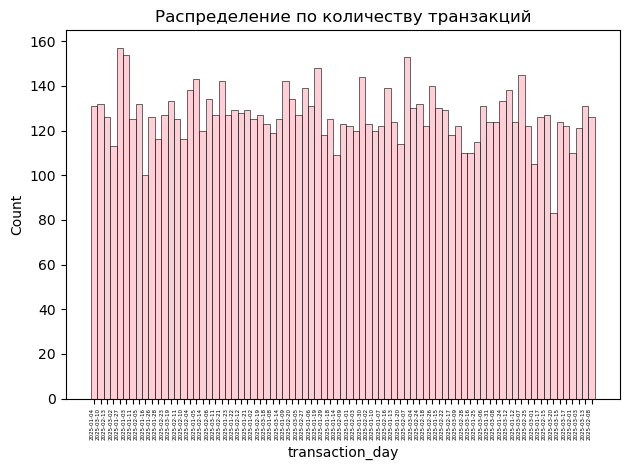

In [69]:
sns.histplot(data = df_general2, x = 'transaction_day', bins=20, color='pink')
plt.title('Распределение по количеству транзакций')
plt.xticks(rotation=90, ha='right', fontsize=4)
plt.tight_layout() 
plt.show()
# Пропорции почти удалось соблюсти 

Теперь преобразуем даты в день, год, месяц

In [71]:
df_general2['day'] = df_general2.transaction_day.apply(lambda x: x.split('-')[2])

In [72]:
df_general2['year'] = df_general2.transaction_day.apply(lambda x: x.split('-')[0])
df_general2['month'] = df_general2.transaction_day.apply(lambda x: x.split('-')[1])

In [73]:
df_general2.month.unique() #данные всего за 3 месяца, предпологаю что год один 

array(['01', '03', '02'], dtype=object)

In [74]:
df_general2.year.unique() #в принципе данные столбец можно удалить

array(['2025'], dtype=object)

In [75]:
df_general2 = df_general2.drop(['year'], axis =1)

## 2. Анализ данных

### 2.1. Определить топ-5 наиболее популярных услуг по количеству заказов

In [78]:
popular_service = df_general2.service.value_counts()
popular_service #их всего 5, можем визуализировать 

service
Инвестиционное консультирование    3419
Управление активами                2014
Финансовое планирование            1532
Налоговое планирование             1528
Структурирование капитала          1507
Name: count, dtype: int64

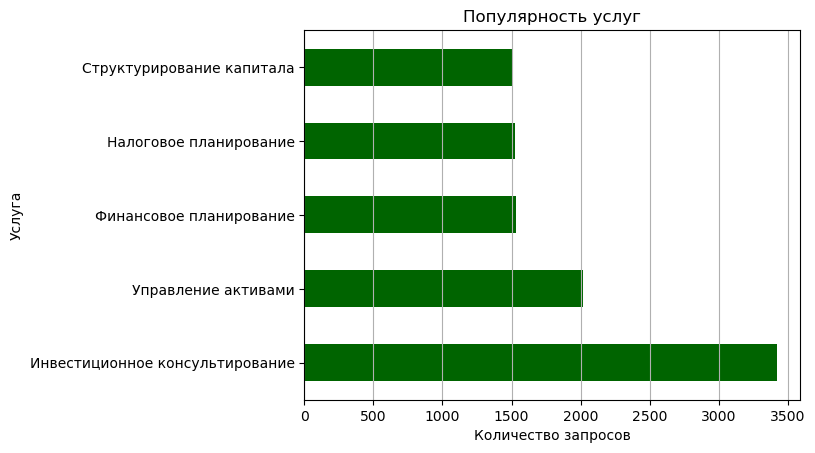

In [79]:
popular_service.plot(kind='barh', title='Популярность услуг', color = 'darkgreen')
plt.xlabel('Количество запросов')
plt.ylabel('Услуга')
plt.grid(axis='x')
plt.show()

### 2.2. Рассчитать среднюю сумму транзакций по каждому городу

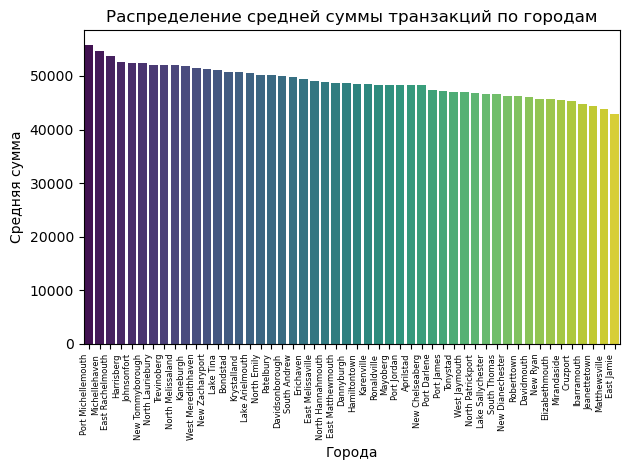

In [81]:
aver_transaction = pd.DataFrame(df_general2.groupby('city')['amount'].mean().round(2).sort_values(ascending=False).reset_index())
aver_transaction = aver_transaction.rename(columns = {'amount':'average_amount'})
sns.barplot(data = aver_transaction, x = 'city', y='average_amount', palette = 'viridis' )
plt.title('Распределение средней суммы транзакций по городам')
plt.tight_layout() 
plt.xlabel('Города')
plt.ylabel('Средняя сумма')
plt.xticks(rotation = 90, ha = 'right', fontsize=6)
plt.tight_layout() 
plt.show()

In [82]:
#И сами данные 
aver_transaction

,city,average_amount
0,Port Michellemouth,55711.71
1,Michellehaven,54599.91
2,East Rachelmouth,53660.85
3,Harrisberg,52564.41
4,Johnsonfort,52463.32
5,New Tommyborough,52353.35
6,North Lauriebury,52044.88
7,Trevinoberg,51948.66
8,North Melissaland,51941.17
9,Kaneburgh,51935.77


#### 2.3. Определить услугу с наибольшей выручкой (по сумме amount).

In [84]:
df_general2.groupby('service')['amount'].sum().sort_values(ascending=False).apply(lambda x: f'{x:.2f}')

service
Инвестиционное консультирование    169525599.91
Управление активами                 97870088.88
Финансовое планирование             75712480.40
Налоговое планирование              74225993.99
Структурирование капитала           71639917.62
Name: amount, dtype: object

Вывод: услуга 'Инвестиционное консультирование' 

#### 2.4. Вычислить процент транзакций по способам оплаты (наличные, банковский перевод и т. д.)

In [87]:
payment = pd.DataFrame(df_general2.payment_method.value_counts().reset_index())
payment['percent_payment'] = payment['count'].apply(lambda x: round(x/len(df_general2.payment_method)*100, 2))
payment

,payment_method,count,percent_payment
0,Кредитная карта,5007,50.07
1,Банковский перевод,3464,34.64
2,Наличные,985,9.85
3,Криптовалюта,544,5.44


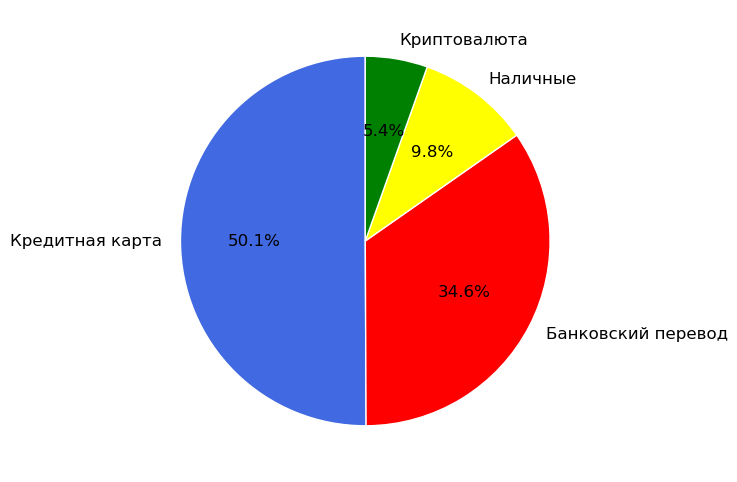

In [88]:
plt.figure(figsize=(8, 6))
plt.pie(
    payment['count'],
    labels=payment['payment_method'],
    autopct=lambda p: f'{p:.1f}%',  
    startangle=90, 
    colors=['royalblue', 'red', 'yellow', 'green'],  
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
    textprops={'fontsize': 12}
)
plt.show()

#### 2.5. Рассчитать выручку за последний месяц (по сумме amount).

In [90]:
value = round(df_general2.groupby('month')['amount'].sum()[2], 2)
print(f"Выручка за март составила {value:,.2f}".replace(",", " "))

Выручка за март составила 122 201 091.33


#### 2.6. Создать новую колонку с уровнями активов

In [92]:
def categorize_assets(amount):
    if amount < 100000:
        return 'Низкий капитал'
    elif 100000 <= amount <= 1000000:
        return 'Средний капитал'
    else:
        return 'Высокий капитал'

df_general2['capital'] = df_general2.net_worth.apply(categorize_assets)

In [93]:
# Проводим анализ по уровням активов 
df_general2.capital.value_counts()

capital
Высокий капитал    8187
Средний капитал    1639
Низкий капитал      174
Name: count, dtype: int64

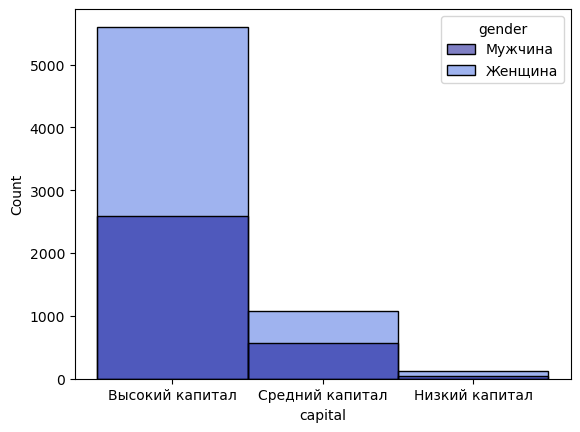

In [94]:
# Больше всего людей с высоким капиталом, посмотрим, как влияет распределение между полам 
gender_palette = {
    'Мужчина': 'darkblue', 
    'Женщина': 'royalblue'
}
sns.histplot(df_general2, 
             x = 'capital', 
             hue = 'gender',
             palette = gender_palette)
plt.show()

Вывод: женщин чуть больше, поэтому такое распределение, в целом можно сказать, что одинаково.
Попробуем также с возрастом - для этого сделаем отдельную колонку по возрасту до 35, от 35 до 50 и старше 

In [96]:
def categorize_age(age):
    if age < 35:
        return 'young'
    elif 35 <= age <= 50:
        return 'average'
    else:
        return 'adult'

df_general2['category_age'] = df_general2['age'].apply(categorize_age)

In [97]:
df_general2['category_age'].value_counts()

category_age
average    4625
young      3216
adult      2159
Name: count, dtype: int64

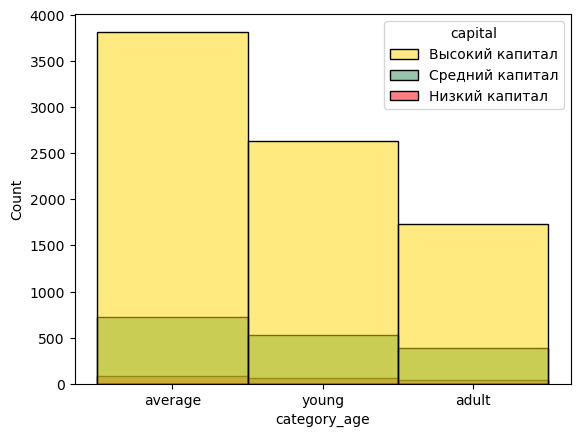

In [98]:
capital_palette = {
    'Высокий капитал': '#FFD700',  
    'Низкий капитал': 'red',  
    'Средний капитал': '#2E8B57'}

sns.histplot(df_general2, 
             x = 'category_age', 
             hue = 'capital',
             palette = capital_palette)
plt.show()

Как видно из гистограммы у средней возрастной группы больше всего вложений высокого капитала
Но в пропорциях у всех примерно одинаково, с низким капиталом людей в принципе мало

Смотрим, сколько выручки приносит та или иная группа людей

In [101]:
value_capital = pd.DataFrame(df_general2.groupby('capital')['amount'].sum().apply(lambda x: f'{x:,.2f}'.replace(',',' ')).reset_index())
value_capital = value_capital.rename(columns = {'amount':'general_amount'})
value_capital

,capital,general_amount
0,Высокий капитал,402 070 324.05
1,Низкий капитал,8 288 283.18
2,Средний капитал,78 615 473.57


Из таблицы видно, что люди с высоким капиталом приносят больше всего прибыли

#### 2.7. Построить распределение сумм транзакций

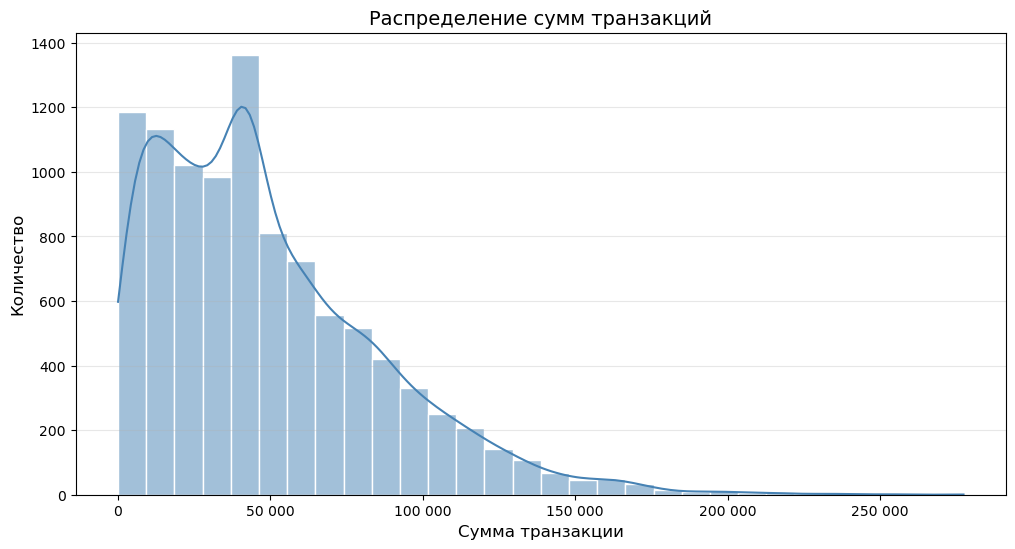

In [104]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df_general2, x='amount', 
                 bins=30, kde=True,
                 color='#4682B4', edgecolor='white')

plt.title('Распределение сумм транзакций', fontsize=14)
plt.xlabel('Сумма транзакции', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Форматирование подписей
ax.set_xticklabels([f'{int(x):,}'.replace(',', ' ') for x in ax.get_xticks()])
plt.grid(axis='y', alpha=0.3)

plt.show()

#### 2.8. Диаграмма выручки по услугам

In [106]:
value_service = pd.DataFrame(df_general2.groupby('service')['amount'].sum().apply(lambda x: f'{x:.2f}').reset_index())
value_service

,service,amount
0,Инвестиционное консультирование,169525599.91
1,Налоговое планирование,74225993.99
2,Структурирование капитала,71639917.62
3,Управление активами,97870088.88
4,Финансовое планирование,75712480.40


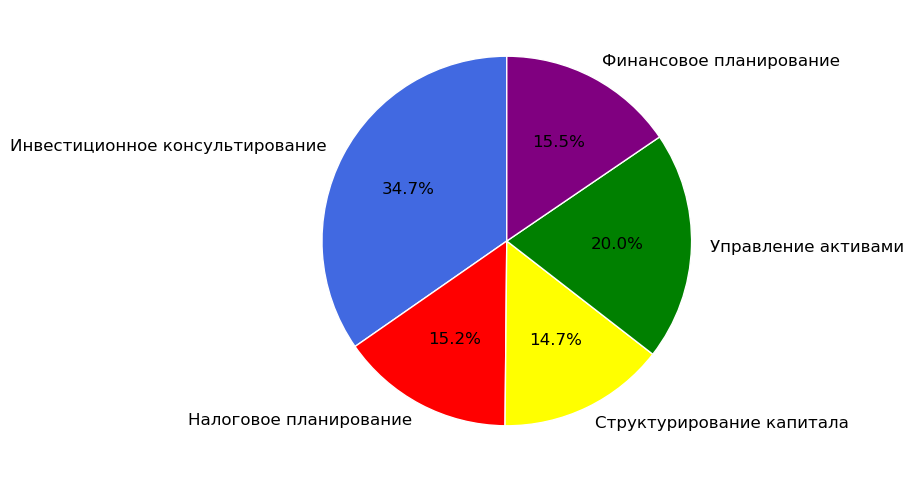

In [107]:
plt.figure(figsize=(8, 6))
plt.pie(
    value_service['amount'],
    labels=value_service['service'],
    autopct=lambda p: f'{p:.1f}%',  
    startangle=90, 
    colors=['royalblue', 'red', 'yellow', 'green', 'purple'],  
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
    textprops={'fontsize': 12}
)
plt.show()

#### 2.9. График зависимости средней суммы транзакции от возраста клиентов.

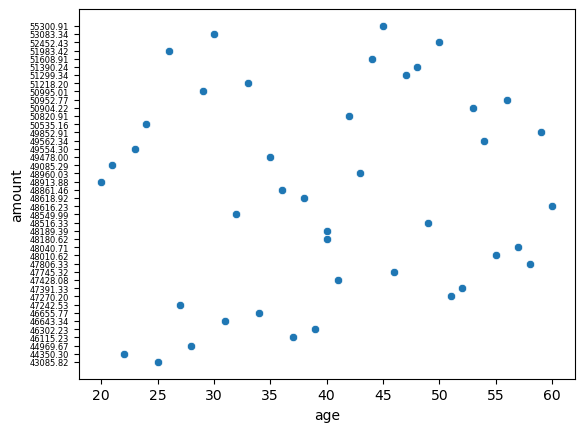

In [109]:
amount_age = pd.DataFrame(df_general2.groupby('age')['amount'].mean().apply(lambda x: f'{x:.2f}').sort_values(ascending=False).reset_index())
sns.scatterplot(amount_age, x = 'age', y = 'amount')
plt.yticks(fontsize=6)
plt.show()
# нет никакой зависимости от возрасты и средней суммы транзакции 

## 3. Прогнозирование

In [111]:
# Скопируем датасет. Из него сразу можно удалить столбцы id и номер транзакции, а также добавленые столбцы 
df_general3 = df_general2.drop(columns = ['category_age', 'capital'])

<Axes: >

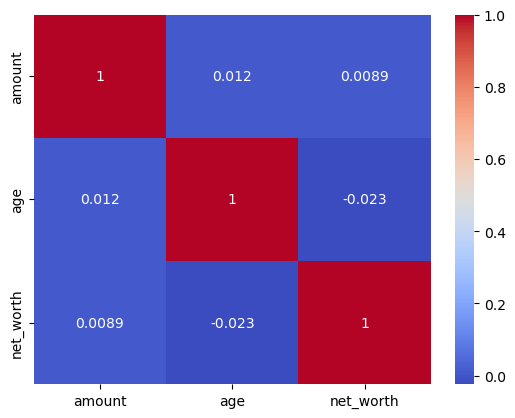

In [112]:
# Смотрим корреляцию между столбцами. Для этого отберем числовые значения 
numeric_df_general = df_general3.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df_general.corr(), annot = True, cmap = 'coolwarm')

In [113]:
df_general2

,transaction_id,id,service,amount,payment_method,city,consultant,age,gender,net_worth,transaction_day,day,month,capital,category_age
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller,41.0,Мужчина,2514729.46,2025-01-04,04,01,Высокий капитал,average
1,0d5263ec-413d-44d9-a9d3-a996e3a56b05,c940f45c-d29b-439a-8fa3-f75018cef528,Структурирование капитала,37514.809209,Кредитная карта,New Zacharyport,Frank Pollard,28.0,Мужчина,566568.29,2025-03-10,10,03,Средний капитал,young
2,5e9a8978-df1c-483f-a53b-16149c93f11e,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,Структурирование капитала,21022.146872,Кредитная карта,Port Michellemouth,Alexandra Meyer,55.0,Женщина,1896001.28,2025-02-13,13,02,Высокий капитал,adult
3,524031ea-56e2-410a-aee2-e8fc6ae3fbc5,NaN,Финансовое планирование,2313.980219,Кредитная карта,Erichaven,Patricia Haas,38.0,Женщина,4538759.60,2025-03-02,02,03,Высокий капитал,average
4,0aed2448-4e41-4dfb-8de5-7a9e6f6d8d33,NaN,Управление активами,110744.480002,Банковский перевод,New Ryan,Phillip White,38.0,Женщина,4538759.60,2025-01-27,27,01,Высокий капитал,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8c90fcca-6a86-4126-a645-62f0f00e09ff,b79d6e9f-75f6-4af9-8fdf-b42aac298a84,Налоговое планирование,117114.096418,Кредитная карта,South Thomas,John Wolfe,33.0,Женщина,699254.80,2025-01-14,14,01,Средний капитал,young
9996,2234c632-4ee9-4564-8640-dd6b76838487,d2a4a79b-26ba-41c9-b720-1362b9f464f0,Финансовое планирование,19895.571828,Кредитная карта,Davidsonborough,Ronald Shepherd,31.0,Женщина,2856777.27,2025-02-17,17,02,Высокий капитал,young
9997,03532e95-60c2-45ff-a731-3651d596989d,5e1d67fb-26ea-48cc-9e2d-e2edbda404d0,Инвестиционное консультирование,79279.034410,Банковский перевод,Lake Arielmouth,Mary Howard,49.0,Женщина,3865097.90,2025-02-09,09,02,Высокий капитал,average
9998,f5df7e5e-5e5e-4492-afc7-98040ff89dde,77ea6e72-df3c-47d4-a043-f990cc05a6f4,Инвестиционное консультирование,26365.015457,Криптовалюта,Tonystad,David Palmer,33.0,Женщина,4873134.42,2025-01-21,21,01,Высокий капитал,young


Корреляции нет. Теперь можем прогнозировать спрос, сначала сгруппируем по месяцам

In [115]:
monthy_value = pd.DataFrame(df_general3['month'].value_counts().reset_index())
monthy_value #посчитали какой объем услуг был по месяцу

,month,count
0,01,3952
1,02,3582
2,03,2466


In [116]:
df_general3['transaction_day'] = pd.to_datetime(df_general3['transaction_day'])
day_value = pd.DataFrame(df_general3['transaction_day'].value_counts().reset_index())
day_value = day_value.rename(columns={'count':'demand'})
day_value #по дням 

,transaction_day,demand
0,2025-01-27,157
1,2025-01-03,154
2,2025-02-07,153
3,2025-01-19,148
4,2025-03-07,145
...,...,...
74,2025-02-28,110
75,2025-01-14,109
76,2025-03-01,105
77,2025-01-16,100


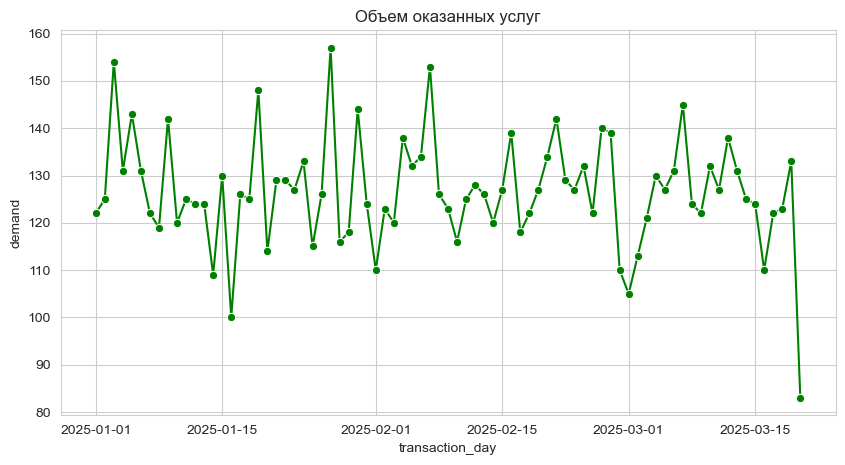

In [117]:
sns.set_style("whitegrid")  
plt.figure(figsize=(10, 5))
sns.lineplot(day_value, x= 'transaction_day', y='demand', marker='o', color='green')

plt.title('Объем оказанных услуг')
plt.show()

Оказанные услуги c середины марта упали

<Axes: ylabel='demand'>

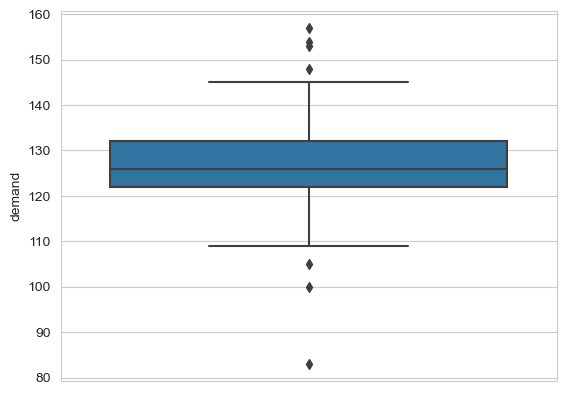

In [119]:
# Посмотрим на выбросы 
sns.boxplot(day_value, y = 'demand')

In [120]:
# Заменим выбросы на межквартильный размах
def replace_outliers_with_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = round((Q1 - 1.5 * IQR), 0)
    upper_bound = round((Q3 + 1.5 * IQR), 0)
    
    data = data.clip(lower_bound, upper_bound)
    
    return data

In [121]:
day_value['demand'] = replace_outliers_with_iqr(day_value['demand'])
day_value

,transaction_day,demand
0,2025-01-27,147
1,2025-01-03,147
2,2025-02-07,147
3,2025-01-19,147
4,2025-03-07,145
...,...,...
74,2025-02-28,110
75,2025-01-14,109
76,2025-03-01,107
77,2025-01-16,107


In [122]:
for lag in [1, 2, 3]:
    day_value[f'demand_lag_{lag}'] = day_value['demand'].shift(lag)

In [123]:
day_value = day_value.dropna()
day_value

,transaction_day,demand,demand_lag_1,demand_lag_2,demand_lag_3
3,2025-01-19,147,147.0,147.0,147.0
4,2025-03-07,145,147.0,147.0,147.0
5,2025-01-30,144,145.0,147.0,147.0
6,2025-01-05,143,144.0,145.0,147.0
7,2025-02-21,142,143.0,144.0,145.0
...,...,...,...,...,...
74,2025-02-28,110,110.0,110.0,113.0
75,2025-01-14,109,110.0,110.0,110.0
76,2025-03-01,107,109.0,110.0,110.0
77,2025-01-16,107,107.0,109.0,110.0


In [124]:
X = day_value[['demand_lag_1', 'demand_lag_2', 'demand_lag_3']]  # Признаки
y = day_value['demand']  # Целевая переменная

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [125]:
day_value['predicted'] = model.predict(X)

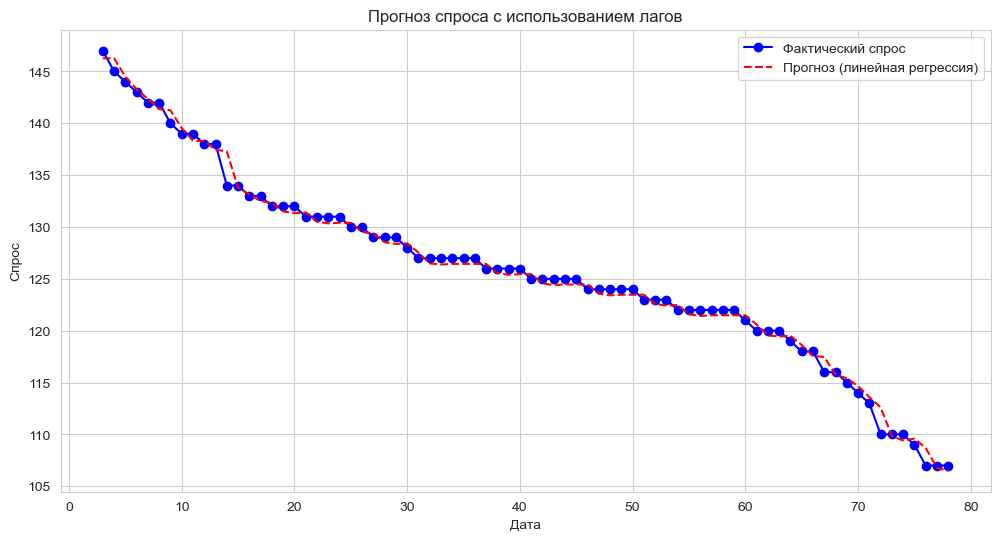

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(day_value.index,day_value['demand'], label='Фактический спрос', marker='o', color='blue')
plt.plot(day_value.index, day_value['predicted'], label='Прогноз (линейная регрессия)', linestyle='--', color='red')
plt.title('Прогноз спроса с использованием лагов')
plt.xlabel('Дата')
plt.ylabel('Спрос')
plt.legend()
plt.grid(True)
plt.show()

Оценка точности модели

In [128]:
mae = mean_absolute_error(y, day_value['predicted'])
r2 = r2_score(y, day_value['predicted'])

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"R² (коэффициент детерминации): {r2:.2f}")

Средняя абсолютная ошибка (MAE): 0.60
R² (коэффициент детерминации): 0.99


In [231]:
mape = 100 * (mae / np.mean(day_value['predicted']))
print(f"Относительная ошибка: {mape:.1f}%")

Относительная ошибка: 0.5%


Это хороший показатели метрики 

### Прогноз на следующие даты

In [130]:
last_lags = day_value.iloc[-1][['demand_lag_1', 'demand_lag_2', 'demand_lag_3']].values.reshape(1, -1)
next_demand = model.predict(last_lags)

print(f"Прогноз спроса на следующий период: {next_demand[0]:.0f}")

Прогноз спроса на следующий период: 107
